In [1]:
import os,glob,shutil,copy
from drizzlepac import astrodrizzle
from pyaxe import axetasks
from pyaxehelper.pyaxehelper import *

from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

cwd = os.getcwd()


The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       config_testbed      imagefindpars           mapreg       
       photeq            pixreplace           pixtopix            pixtosky      
  refimagefindpars       resetbits          runastrodriz          skytopix      
     tweakback            tweakreg           updatenpol
Saving pyaxe logging to 'axe_output.log'

********************************************************************
* Welcome to pyaxe! This version is independent of IRAF and PyRAF. *
********************************************************************

AXE_IMAGE_PATH not defined, using DATA
AXE_OUTPUT_PATH not defined, using OUTPUT
AXE_CONFIG_PATH not defined, using CONF
AXE_DRIZZLE_PATH not defined, using DRIZZLE
AXE_SIMDATA_PATH not defined, using SIMDATA
AXE_OUTSIM_PATH not defi

In [2]:
import pyaxe
pyaxe.__version__


'0.1.dev29+gf57de55.d20200106'

# Prepare meta info for flt files

In [3]:
### Create a list of flt files including both grism and direct images

os.chdir(cwd)
path = 'BACKUP_DATA/mastDownload/HST/*/*flt.fits'
FILES = glob.glob(path)
FILES


### Copy CONF/ and SEX/ to .
if 'CONF' not in glob.glob('*'):
    os.mkdir('CONF')
os.system('cp BACKUP_DATA/CONF/* CONF/')
if 'SEX' not in glob.glob('*'):
    os.mkdir('SEX')
os.system('cp BACKUP_DATA/SEX/* SEX/')

0

In [4]:
# Prepare metadata and make pairs
### NOTE: check GID[key]['DIRECT'] for the suggested pair
### NOTE: change pair manually if the suggestion is not optimal

os.chdir(cwd)
GID,DID = make_meta(FILES)   
GID


{1: {'FILE_ORIG': 'BACKUP_DATA/mastDownload/HST/idco02pvq/idco02pvq_flt.fits',
  'FILTER': 'G141',
  'EXPSTART': 57848.52624278,
  'POSTARG1': 8.0,
  'POSTARG2': 12.0,
  'DIRECT': {'ID': 5,
   'FILE_ORIG': 'BACKUP_DATA/mastDownload/HST/idco02ptq/idco02ptq_flt.fits',
   'FILTER': 'F160W',
   'EXPSTART': 57848.52525907,
   'POSTARG1': 8.0,
   'POSTARG2': 12.0}},
 2: {'FILE_ORIG': 'BACKUP_DATA/mastDownload/HST/idco02prq/idco02prq_flt.fits',
  'FILTER': 'G141',
  'EXPSTART': 57848.51723833,
  'POSTARG1': 8.0,
  'POSTARG2': 28.0,
  'DIRECT': {'ID': 4,
   'FILE_ORIG': 'BACKUP_DATA/mastDownload/HST/idco02ppq/idco02ppq_flt.fits',
   'FILTER': 'F160W',
   'EXPSTART': 57848.51625463,
   'POSTARG1': 8.0,
   'POSTARG2': 28.0}},
 3: {'FILE_ORIG': 'BACKUP_DATA/mastDownload/HST/idco02q9q/idco02q9q_flt.fits',
  'FILTER': 'G141',
  'EXPSTART': 57848.57902055,
  'POSTARG1': -48.0,
  'POSTARG2': -12.0,
  'DIRECT': {'ID': 0,
   'FILE_ORIG': 'BACKUP_DATA/mastDownload/HST/idco02q7q/idco02q7q_flt.fits',
   '

In [5]:
# Create GRISM/
# Copy grism files to GRISM/
# Make GRISM.lis in GRISM/

# Create DIRECT/
# Copy direct files to DIRECT/
# Make DIRECT.lis in DIRECT/
# NOTE: only direct files that have been paired will be processed

os.chdir(cwd)
prepare_folders(GID)


# Drizzle GRISM for astrometry

In [6]:
# Check if files are correct
os.chdir(cwd)
os.chdir("GRISM")
!ls *flt.fits
!cat GRISM.lis
os.chdir(cwd)

idco02prq_flt.fits idco02pvq_flt.fits idco02q9q_flt.fits
idco02pvq_flt.fits
idco02prq_flt.fits
idco02q9q_flt.fits


In [7]:
os.chdir(cwd)
os.chdir('GRISM')
astrodrizzle.AstroDrizzle("@GRISM.lis", output="GRISM", build=True)
os.chdir(cwd)

Setting up logfile :  astrodrizzle.log
AstroDrizzle Version 3.1.3 (2019-11-06 14:37:50 -0500) started at: 16:20:00.95 (10/01/2020)

==== Processing Step  Initialization  started at  16:20:00.957 (10/01/2020)
Preserving original of:  idco02pvq_flt.fits as  OrIg_files/idco02pvq_flt.fits
Preserving original of:  idco02prq_flt.fits as  OrIg_files/idco02prq_flt.fits
Preserving original of:  idco02q9q_flt.fits as  OrIg_files/idco02q9q_flt.fits
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 194.25223023395577  22.03308430296487  
CRPIX : 761.0  634.5  
CD1_1 CD1_2  : -2.534032160485279e-05  2.5040143421854492e-05  
CD2_1 CD2_2  : 2.5040143421854492e-05  2.534032160485279e-05  
NAXIS : 1522  1269
********************************************************************************
*
*  Estimated memory usage:  up to 89 Mb.
*  Output image size:       1522 X 1269 pixels. 
*  Output image file:       ~ 22 Mb. 
*  Cores available:         3
*
*****************************

# Drizzle DIRECT for astrometry given GRISM

### NOTE: use GRISM_drz.fits as reference

In [8]:
# Check if files are correct
os.chdir(cwd)
os.chdir("DIRECT")
!ls *flt.fits
!cat DIRECT.lis
os.chdir(cwd)

idco02ppq_flt.fits idco02ptq_flt.fits idco02q7q_flt.fits
idco02ptq_flt.fits
idco02ppq_flt.fits
idco02q7q_flt.fits


In [9]:
os.chdir(cwd)
os.chdir('DIRECT')
ref = "../GRISM/GRISM_drz.fits[1]"
astrodrizzle.AstroDrizzle("@DIRECT.lis",output="DIRECT",in_memory=False,skysub="yes",
                          build=True,driz_cr_corr=True,driz_cr=True,final_wcs=True,driz_separate=True,
                          driz_sep_wcs=True,driz_sep_refimage=ref,final_refimage=ref)
os.chdir(cwd)

Setting up logfile :  astrodrizzle.log
AstroDrizzle Version 3.1.3 (2019-11-06 14:37:50 -0500) started at: 16:20:08.170 (10/01/2020)

==== Processing Step  Initialization  started at  16:20:08.173 (10/01/2020)
Preserving original of:  idco02ptq_flt.fits as  OrIg_files/idco02ptq_flt.fits
Preserving original of:  idco02ppq_flt.fits as  OrIg_files/idco02ppq_flt.fits
Preserving original of:  idco02q7q_flt.fits as  OrIg_files/idco02q7q_flt.fits
Creating OUTPUT WCS from ../GRISM/GRISM_drz.fits[1]
WCS Keywords

CD_11  CD_12: -2.5340321604852e-05 2.50401434218544e-05
CD_21  CD_22: 2.50401434218544e-05 2.53403216048527e-05
CRVAL    : 194.2522302339558 22.03308430296487
CRPIX    : 761.0 634.5
NAXIS    : 1522 1269
Plate Scale : 0.12825000286102065
ORIENTAT : 44.65862285194273
********************************************************************************
*
*  Estimated memory usage:  up to 89 Mb.
*  Output image size:       1522 X 1269 pixels. 
*  Output image file:       ~ 22 Mb. 
*  Cores avail

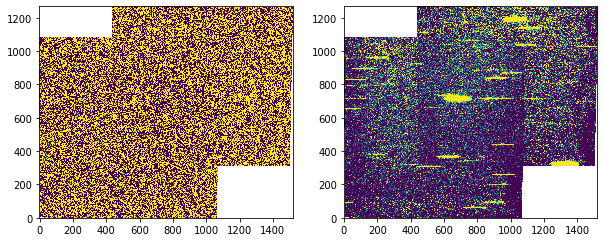

In [10]:
os.chdir(cwd)

plt.rcParams["figure.figsize"] = (10,7)
plt.subplot(1,2,1)
d = fits.open("DIRECT/DIRECT_drz.fits")[1].data
im1 = plt.imshow(d,origin="corner")
im1.set_clim(0,.2)

plt.subplot(1,2,2)
d = fits.open("GRISM/GRISM_drz.fits")[1].data
im1 = plt.imshow(d,origin="corner")
im1.set_clim(0,.2)

# Make a source catalog

### NOTE: make the source catalog from direct_drz.fits file

We create an object catalog using sextractor

This is one step that needs to be done carefully as several things can go wrong.
- Make sure you set the magnitude zeropoint properly for the image you are using
- One can generate a simple catalog using:

    sex -c aXe.sex F140W_drz.fits[1] -DETECT_THRESH 5 -MAG_ZEROPOINT 26.4525
    
    
- See aXe.param for the required parameters that aXe will be looking for
- Check the resulting catalog to make sure that all objects have good magnitudes (i.e. no mag of 99.)
- Edit cookbook.cat and rename column MAG_ISO with MAG_F1392, or you will get an "aXeError: Catalogue: test.cat does not contain any magnitude column!" error when running iolprep

This catalog, when doing a simple extraction, will be used to compute the SED of each sources. These SEDs will be used to compute our contamination models. In this example, we used a single band, F140W, but we could have added information in other bands such as F125W for example. This requires running Sextractor in matched photometry mode, and the creation of a catalog where magnitudes in multiple bands are properly listed

For simplicity, here, we copy an already generated catalog:

In [11]:
# Create SEX/
# Copy DIRECT_drz.fits to SEX/
# Run sextractor

os.chdir(cwd)

x = glob.glob(cwd+'/*')
if cwd+'/SEX' not in x:
    os.mkdir(cwd+'/SEX')

os.chdir('SEX')
!sex -c aXe.sex ../DIRECT/DIRECT_drz.fits[1] -DETECT_THRESH 5 -MAG_ZEROPOINT 26.4525


> 
----- SExtractor 2.19.5 started on 2020-01-10 at 16:20:15 with 1 thread

> Setting catalog parameters
> Reading detection filter
> Initializing check-image(s)
> Initializing catalog
> Looking for DIRECT_drz.fits
----- Measuring from: DIRECT_drz.fits [1/4]
      "Unnamed" / no ext. header / 1522x1269 / 32 bits (floats)
Detection+Measurement image: > Setting up background maps
> Setting up background map at line:   64
> Setting up background map at line:  128
> Setting up background map at line:  192
> Setting up background map at line:  256
> Setting up background map at line:  320
> Setting up background map at line:  384
> Setting up background map at line:  448
> Setting up background map at line:  512
> Setting up background map at line:  576
> Setting up background map at line:  640
> Setting up background map at line:  704
> Setting up background map at line:  768
> Setting up background map at line:  832
> Setting up background map at line:  896
> Setting up background map at 

In [12]:
os.chdir(cwd)
os.system('cp SEX/cookbook.cat .')

0

In [13]:
os.chdir(cwd)
!cat cookbook.cat


#   1 X_IMAGE                Object position along x                                    [pixel]
#   2 Y_IMAGE                Object position along y                                    [pixel]
#   3 NUMBER                 Running object number                                     
#   4 X_WORLD                Barycenter position along world x axis                     [deg]
#   5 Y_WORLD                Barycenter position along world y axis                     [deg]
#   6 A_IMAGE                Profile RMS along major axis                               [pixel]
#   7 B_IMAGE                Profile RMS along minor axis                               [pixel]
#   8 THETA_IMAGE            Position angle (CCW/x)                                     [deg]
#   9 A_WORLD                Profile RMS along major axis (world units)                 [deg]
#  10 B_WORLD                Profile RMS along minor axis (world units)                 [deg]
#  11 THETA_WORLD            Position angle (CCW/world-x) 

In [14]:
### pyaXeHelper has select_source() to match RA,DEC of a known object to the source catalog

os.chdir(cwd)
RA,DEC = 1.942597375000E+02,2.203130000000E+01
SOURCE = select_source(RA,DEC,'cookbook.cat')
SOURCE

#   1 X_IMAGE                Object position along x                                    [pixel]\n      572.140700
#   2 Y_IMAGE                Object position along y                                    [pixel]\n      714.060100
#   3 NUMBER                 Running object number                                     \n               57.000000
#   4 X_WORLD                Barycenter position along world x axis                     [deg]\n        194.259542
#   5 Y_WORLD                Barycenter position along world y axis                     [deg]\n         22.030371
#   6 A_IMAGE                Profile RMS along major axis                               [pixel]\n        1.237000
#   7 B_IMAGE                Profile RMS along minor axis                               [pixel]\n        1.194000
#   8 THETA_IMAGE            Position angle (CCW/x)                                     [deg]\n         -9.080000
#   9 A_WORLD                Profile RMS along major axis (world units)                 

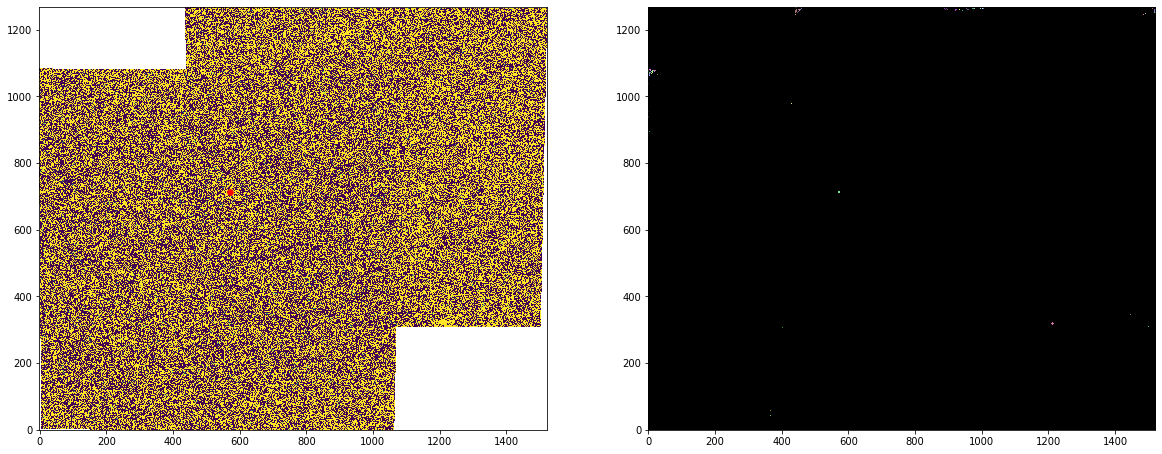

In [15]:
from photutils import SegmentationImage

os.chdir(cwd)

fig,ax = plt.subplots(1,2,figsize=(20,10))
x = fits.open('DIRECT/DIRECT_drz.fits')
xdata = x[1].data
m = np.where(np.isfinite(xdata))
x2 = ax[0].imshow(xdata,origin='lower',cmap='viridis')
x2.set_clim(0.,0.2)
x = fits.open('SEX/seg.fits')
segm = SegmentationImage(x[0].data)
cmap = segm.make_cmap(random_state=12345)
ax[1].imshow(segm,origin='lower',cmap=cmap)

x0,y0 = SOURCE[0],SOURCE[1]
ax[0].scatter(x0,y0,s=30,color='red')

os.chdir(cwd)


# Run iolprep

### NOTE: *_1.cat will be created in F140W/, then will be copied to DATA/

iolprep takes direct_drz.fits file and its source catalog (with dimension_in). Then, it creates *_1.cat for each direct_flt.fits files.

Then, copy *_1.cat to DATA/

In [16]:
dimension_info = "183,85,50,50"

In [17]:
os.chdir(cwd)
os.chdir("DIRECT")
axetasks.iolprep(drizzle_image='DIRECT_drz.fits',
                     input_cat='../cookbook.cat',
                     dimension_in=dimension_info)

# This will create ib6o23*_1.cat
!ls *.cat
os.chdir(cwd)

idco02ppq_flt_1.cat idco02ptq_flt_1.cat idco02q7q_flt_1.cat


In [18]:
# Also copy .cat to DATA/
os.chdir(cwd)
os.chdir('DIRECT')
os.system("cp *_1.cat ../DATA/")
os.chdir(cwd)

# Prepare aXe.lis for grism-direct pairs

### NOTE: aXe.lis must be in ROOT

The aXe.lis file is a simple text file, with a slightly different format than the one above. In this file, each line contains 3 items:
- The name of a G141 FLT file (e.g. [grism_rootname]_flt.fits
- A catalog name with a name of [direct_rootname]_flt_1.cat
- The name of the direct imaging file [direct_rootname]_flt.fits associated with the G141 data and the catalog. 

In [19]:
# Create aXe.lis

os.chdir(cwd)
make_axelis(GID)


In [20]:
!cat aXe.lis

idco02pvq_flt.fits idco02ptq_flt_1.cat idco02ptq_flt.fits
idco02prq_flt.fits idco02ppq_flt_1.cat idco02ppq_flt.fits
idco02q9q_flt.fits idco02q7q_flt_1.cat idco02q7q_flt.fits


# Run axeprep

We run aXeprep. This task will amongst other things take care of background subtracting the G141 data using a single master sky.

In [21]:
### Copy all flt files to DATA/
os.chdir(cwd)
os.system("cp GRISM/*flt.fits DATA/")
os.system("cp DIRECT/*flt.fits DATA/")


0

In [22]:
WAVELENGTH = 1536.9

In [23]:
os.chdir(cwd)
change_magiso2magwavelength('cookbook.cat',wavelength=WAVELENGTH)
change_catalog_order('cookbook.cat')


In [24]:
os.chdir(cwd)
os.chdir('DATA/')
x = glob.glob('*_1.cat')
for i in x:
    change_magiso2magwavelength(i,wavelength=WAVELENGTH)
    change_catalog_order(i)
os.chdir(cwd)


In [25]:
os.chdir(cwd)
axetasks.axeprep(inlist="aXe.lis",
                     configs="G141.F160W.V4.32.conf",
                     backgr=True,
                     backims="WFC3.IR.G141.sky.V1.0.fits",
                     norm=False,
                     mfwhm=3.0)


In [26]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


# Run axecore

We can now proceed with a simple box extraction of our G141 spectra. This will not combine individual 1D spectra and we create one extracted spectrum per object and get G141 FLT file we are processing. 
The contamination is estimated using the Gaussian model of each object that is included in the  SExtractor object catalog test.cat.

For each of the G141 input FLT file, this will create the following in the OUTPUT/ directory:
- [rootname]_flt_2.cat : Object catalog for the FLT file [rootname]_flt.fits
- [rootname]_flt_2.OAF : Aperture file
- [rootname]_flt_2.PET.fits : The Pixel Extraction Table, containing all the unbinned information about each spectrum
- [rootname]_flt_2.SPC.fits : 1D extracted spectra
- [rootname]_flt_2.CONT.fits : Contamination estimate for eact of the spectra
- [rootname]_flt_2_opt.SPC.fits : Optimally extracted version of the 1D spectra

While running the next notebook cell, please check the main terminal window as the aXe routines will output things in there. It will take a few minutes to run

Results are in the directory pointed to by os.environ['AXE_OUTPUT_PATH'], i.e. ./OUTPUT 
1D and 2D spectra extracted from individual FLT files are available. These are not combined.
SPC files contained 1D spectra, opt.SPC files contained optimally extracted spectra (using gaussian profiles), STP files contain 2D stamps. CONT files contain the contamination estimate (gaussian based)

In [27]:
axetasks.axecore('aXe.lis',
                 "G141.F160W.V4.32.conf",
                 extrfwhm=4.,
                 drzfwhm=3.,
                 backfwhm=0.,
                 orient=False,
                 weights=True,
                 slitless_geom=False,
                 cont_model='gauss',
                 sampling='drizzle',
                 exclude=True)

INFO:pyaxe.axesrc.inputchecks:reading DATA/idco02ptq_flt_1.cat
INFO:pyaxe.axesrc.inputchecks:reading DATA/idco02ppq_flt_1.cat
INFO:pyaxe.axesrc.inputchecks:reading DATA/idco02q7q_flt_1.cat
INFO:pyaxe.axesrc.axetasks:image is located: idco02pvq_flt.fits
INFO:pyaxe.axesrc.configfile:Initializing configfile with CONF/G141.F160W.V4.32.conf
INFO:pyaxe.axesrc.configfile:
Dispensable Keywords: 
INFO:pyaxe.axesrc.configfile:GFILTER G141 ; GRISM name (not checked by aXe)

INFO:pyaxe.axesrc.configfile:DFILTER F160W ; FILTER used for Direct Imaging (not checked by aXe)

INFO:pyaxe.axesrc.configfile:XRANGE -183. 1099. ; Left and Right coordinates of FOV (not used by aXe)

INFO:pyaxe.axesrc.configfile:YRANGE -1. 1015. ; Lower and Upper coordinates of FOV (not used by aXe)

INFO:pyaxe.axesrc.configfile:DPDL_A_0 -198.97909709239238  0.00022085642768667504  0.015657459895358234  -4.20679688923729e-6  1.2280573229146504e-6  -5.155391423878844e-6

INFO:pyaxe.axesrc.configfile:DPDL_A_1 0.0222285650395761


Generating non-linear coefficients

Storing non-linear coefficients
DRZSCALE set to: 1.0
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


INFO:pyaxe.axesrc.pysex2gol:Saving 23 objects to OUTPUT/idco02pvq_flt_2.cat
INFO:pyaxe.axesrc.pysex2gol:     Done
INFO:pyaxe.axesrc.axelowlev:Command list: ['aXe_GOL2AF', 'idco02pvq_flt.fits', 'G141.F160W.V4.32.conf', '-mfwhm=4.0', '-dmag=0', '-lambda_mark=800.0', '-slitless_geom=0', '-orient=0', '-exclude_faint']
INFO:pyaxe.axesrc.axesingextr:
Making spectra

INFO:pyaxe.axesrc.axelowlev:['aXe_STAMPS', 'idco02pvq_flt.fits', 'G141.F160W.V4.32.conf', '-drzstamp']
INFO:pyaxe.axesrc.axetasks:image is located: idco02prq_flt.fits
INFO:pyaxe.axesrc.configfile:Initializing configfile with CONF/G141.F160W.V4.32.conf
INFO:pyaxe.axesrc.configfile:
Dispensable Keywords: 
INFO:pyaxe.axesrc.configfile:GFILTER G141 ; GRISM name (not checked by aXe)

INFO:pyaxe.axesrc.configfile:DFILTER F160W ; FILTER used for Direct Imaging (not checked by aXe)

INFO:pyaxe.axesrc.configfile:XRANGE -183. 1099. ; Left and Right coordinates of FOV (not used by aXe)

INFO:pyaxe.axesrc.configfile:YRANGE -1. 1015. ; Lower 


Generating non-linear coefficients

Storing non-linear coefficients
DRZSCALE set to: 1.0
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


INFO:pyaxe.axesrc.axesingextr:
Making spectra

INFO:pyaxe.axesrc.axelowlev:['aXe_STAMPS', 'idco02prq_flt.fits', 'G141.F160W.V4.32.conf', '-drzstamp']
INFO:pyaxe.axesrc.axetasks:image is located: idco02q9q_flt.fits
INFO:pyaxe.axesrc.configfile:Initializing configfile with CONF/G141.F160W.V4.32.conf
INFO:pyaxe.axesrc.configfile:
Dispensable Keywords: 
INFO:pyaxe.axesrc.configfile:GFILTER G141 ; GRISM name (not checked by aXe)

INFO:pyaxe.axesrc.configfile:DFILTER F160W ; FILTER used for Direct Imaging (not checked by aXe)

INFO:pyaxe.axesrc.configfile:XRANGE -183. 1099. ; Left and Right coordinates of FOV (not used by aXe)

INFO:pyaxe.axesrc.configfile:YRANGE -1. 1015. ; Lower and Upper coordinates of FOV (not used by aXe)

INFO:pyaxe.axesrc.configfile:DPDL_A_0 -198.97909709239238  0.00022085642768667504  0.015657459895358234  -4.20679688923729e-6  1.2280573229146504e-6  -5.155391423878844e-6

INFO:pyaxe.axesrc.configfile:DPDL_A_1 0.022228565039576174  -2.2310680636779698e-7  -1.72504845


Generating non-linear coefficients

Storing non-linear coefficients
DRZSCALE set to: 1.0
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


INFO:pyaxe.axesrc.axesingextr:
Making spectra

INFO:pyaxe.axesrc.axelowlev:['aXe_STAMPS', 'idco02q9q_flt.fits', 'G141.F160W.V4.32.conf', '-drzstamp']


In [28]:
!ls OUTPUT/*SPC.fits
!ls OUTPUT/*STP.fits

OUTPUT/idco02prq_flt_2.SPC.fits     OUTPUT/idco02pvq_flt_2_opt.SPC.fits
OUTPUT/idco02prq_flt_2_opt.SPC.fits OUTPUT/idco02q9q_flt_2.SPC.fits
OUTPUT/idco02pvq_flt_2.SPC.fits     OUTPUT/idco02q9q_flt_2_opt.SPC.fits
OUTPUT/idco02prq_flt_2.STP.fits OUTPUT/idco02q9q_flt_2.STP.fits
OUTPUT/idco02pvq_flt_2.STP.fits


# OUTPUT

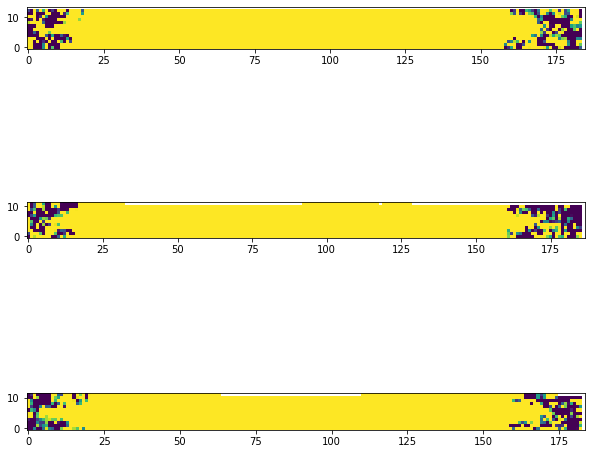

In [29]:
# We can examine individual 2D spectra from the STP files. Note that the STP files are meant for quality control and are not calibrated versions of the 2D spectra. 

os.chdir(cwd)

ID = int(SOURCE[2])

N = len(GID)

plt.rcParams["figure.figsize"] = (10,10)

for i,ii in enumerate(GID):
    plt.subplot(N,1,i+1)
    string = 'OUTPUT/' + GID[ii]['FILE_ORIG'].split('/')[-1].split('.')[0] + '_2.STP.fits'
    try:
        d1 = fits.open(string)["BEAM_%dA" % (ID)].data
        im1 = plt.imshow(d1,origin="corner")
        im1.set_clim(0,.1)
    except:
        print('pass file: {0}'.format(string))
        pass
    

OUTPUT/idco02prq_flt_2.SPC.fits
OUTPUT/idco02q9q_flt_2.SPC.fits
OUTPUT/idco02pvq_flt_2.SPC.fits


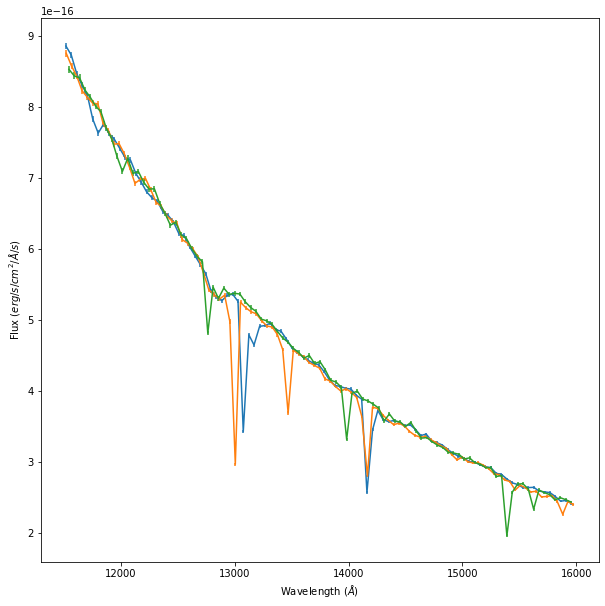

In [30]:
# We now examine the calibrated 1D spectra of one of the sources:
os.chdir(cwd)

import glob
for s in glob.glob("OUTPUT/*2.SPC.fits"):
    print(s)
    d1 = fits.open(s)["BEAM_%dA" % (ID)].data
    w = d1["LAMBDA"]
    f = d1["FLUX"]
    e = d1["FERROR"]
    vg = (w>11500) & (w<16000)
    plt.errorbar(w[vg],f[vg],e[vg])
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Flux ($erg/s/cm^2/\AA/s$)');

OUTPUT/idco02prq_flt_2.SPC.fits
OUTPUT/idco02q9q_flt_2.SPC.fits
OUTPUT/idco02pvq_flt_2.SPC.fits


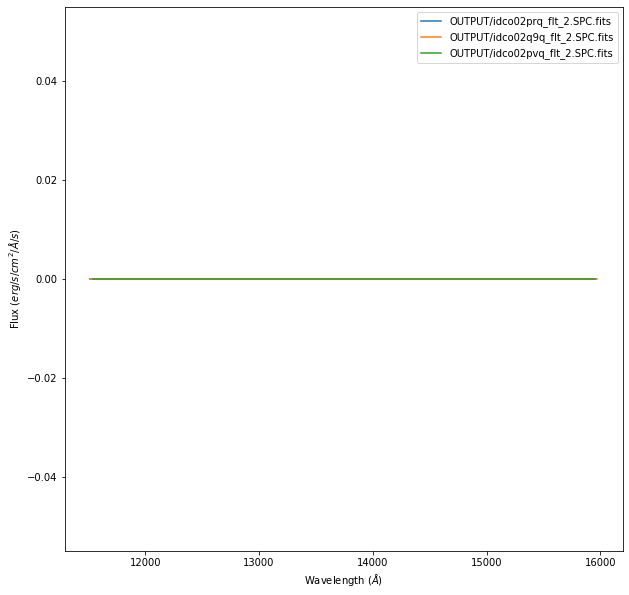

In [31]:
# Contamination is not automatically removed but has been estimated and we can plot it

os.chdir(cwd)
import glob
for s in glob.glob("OUTPUT/*2.SPC.fits"):
    print(s)
    d1 = fits.open(s)["BEAM_%dA" % (ID)].data
    w = d1["LAMBDA"]
    c = d1["CONTAM"]
    vg = (w>11500) & (w<16000)
    plt.plot(w[vg],c[vg],label=s)
plt.legend()
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Flux ($erg/s/cm^2/\AA/s$)');